In [1]:
# Useful starting lines
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from helpers import *
from implementations import*
from cross_validation import *

In [3]:
DATA_TRAIN_PATH = '../../data/train.csv'
y, x, ids = load_csv_data(DATA_TRAIN_PATH)

### Cleaning of the dataset

In [4]:
#Feature names and their respective indices
string_features = 'DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt'
features = string_features.split(",")
dict_ = {}
for ind, feat in enumerate(features):
    dict_[feat] = ind

In [5]:
# selecting only well-defined samples
selector = np.all(x != -999.0, axis=1)
x_non_nan = x[selector]
y_non_nan = y[selector]

In [6]:
# replacing the non-defined features by the mean of the features 
x_mean_replacement = helpers.replace_mean(x)

In [17]:
# replacing the non-defined features by the mean of the features, according by the reactor
x_subgroups_list, ids_list = subgrouping(x, ids, dict_)£
x_subgroups = group(x_subgroups_list, ids_list, dict_)

SyntaxError: invalid character in identifier (<ipython-input-17-ffb52f4722c9>, line 2)

In [12]:
# only taking well-defined features
# careful can output some nan values depending on the kept features
x_selected_features = select_non_nan_columns(x)

In [9]:
# combining subroups and not seclecting all features
x_selected_features_subgoups = select_non_nan_columns(x_subgroups)

In [23]:
# selecting model to use
y_clean = y
x_clean, _, _ = standardize(x_mean_replacement)
x_clean.shape

(250000, 30)

### Least squares

### Least Squares GD

In [19]:
LS_GD_demo(y_clean, x_clean, 4)

KeyboardInterrupt: 

### Least Square SGD

In [ ]:
LS_SGD_demo(y_clean, x_clean, 4)

In [20]:
least_squares_demo(y_clean, x_clean, 4)

C:\Users\User\Documents\Etudes\MA1\ML\ML_Project1\scripts\implementations.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  opt_w = np.linalg.lstsq(tx.T@tx,tx.T@y)[0]


   mse=0.684798233649867
   accuracy=0.744


### Ridge Regression

   lambda=0.099, mse=45.036
   accuracy=0.658


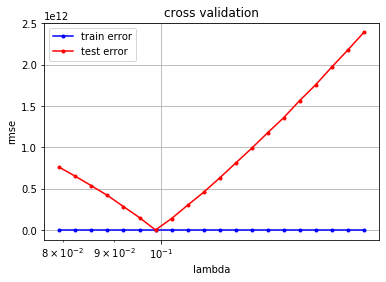

In [22]:
ridge_regression_demo(y_clean, x_clean, degree=12, k_fold=4)

### Logistic regression

In [ ]:
lr_demo(y_clean, x_clean, 4)

### Regularized logistic regression

In [24]:
lrr_demo(y_clean, x_clean, 4)

   gamma=0.000, mse=-187169.834 lambda0.000
   accuracy=0.664


### Outputing the predictions

In [ ]:
DATA_TEST_PATH = '../../data/test.csv' 
OUTPUT_PATH = './submissions'
_, x_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
# cleaning the test input
x_test_subgroups_list, ids_list = subgrouping(x_test, ids_test, dict_)
x_test_subgroups = group(x_test_subgroups_list, ids_list, dict_)
x_test_sel_features_subgoups = select_non_nan_columns(x_test_subgroups)

tx_test = helpers.build_poly(x_test_sel_features_subgoups, 4)

# comptute the model parameters
w, loss = imp.ridge_regression(y_clean, helpers.build_poly(x_clean, 4), lambda_=0.013)

# predict and write predictions
y_pred = predict_labels(w, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)